In [98]:
# Importing the important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # statistical data visualization library
import matplotlib.pyplot as plt # plotting library
from numpy.polynomial.polynomial import polyfit # getting the coefficients of some scattered data points

# Kaggle related portion of code
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/real-estate-price-prediction/Real estate.csv


The shape of the data is: (414, 8)
0
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


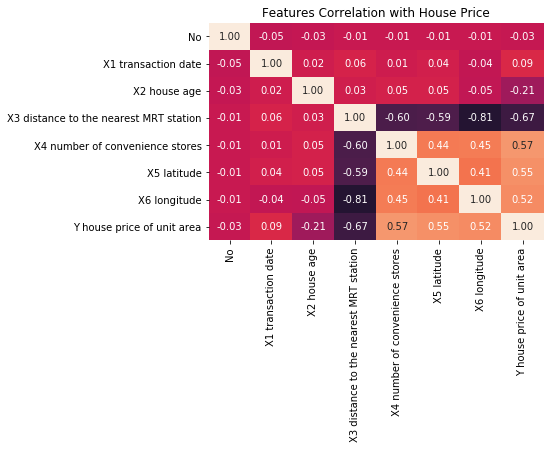

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [187]:
# Reading our dataset
df = pd.read_csv("../input/real-estate-price-prediction/Real estate.csv")

# Getting to know our data (Uncomment lines when needed)
df.head()
print("The shape of the data is", df.shape) # -- (418, 8)
print(df.isna().sum().sum()) # -- prints 0 which means: No Missing Data to work with
print(df.dtypes) # -- only int64 and float64 which means: No Categorical Data to work with only int64 and float64

# Plotting the Correlation Heatmap
ax = plt.axes()
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt ='.2f', cbar = False, ax = ax)
ax.set_title('Features Correlation with House Price')
plt.show()
df.head()

In [74]:
# Removing the column with very low correlation (-0.03) which is the No column
''' Although the logic states that it's just an entries counting column also here by statistcal techniques
it's obvious that the "No" column has no effect with almost every other column and specifically on the price.
So, let's remove it from the dataframe '''
df = df.drop(columns = ["No"], axis = 1)

In [75]:
# Getting our X(feature columns) and y(response column)

all_features_cols = df.columns[0:-1]
X = df[all_features_cols] # Where X holds all the remained features

response_col = df.columns[-1]
y = df[response_col]      # Where y holds the response column

# We can use these to create an ML model and predict any observations using the train_test_split from scikit learn library
# but that will not solve any of our questions.

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


            5             4           3          2
-4.172e-06 x + 0.0003722 x - 0.01023 x + 0.1173 x - 1.638 x + 51.57


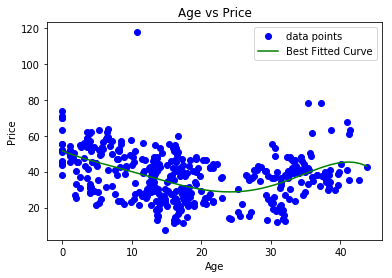

'Solution: It appears that as the age increases the price decrease for the first part, then it got up again!\nmaybe it comes closer to be proven strong building against time although at some point the curve went down again, I think\nthis is cuz being so old is not accepteable -look closer at the end of the curve-'

In [189]:
# Question 1: How does the price changes with the age of the house
age = df["X2 house age"]
price = df["Y house price of unit area"]
plt.plot(age, price, 'bo', label = 'data points')

tmp = np.polyfit(age, price, 5) # returns the coefficients of the equation that approximately resembles our data 
p = np.poly1d(tmp) # returns our equation of n-degree provided as the 3rd argument in the polyfit method
xp = np.linspace(age.min(), age.max(), 50) # generating points to feed to variable p
_ = plt.plot(xp, p(xp), 'g-', label = 'Best Fitted Curve') # plotting using our generated equation

plt.xlabel('Age') # providing the x-axis label
plt.ylabel('Price') # providing the y-axis label
plt.title('Age vs Price') # providing a title for the plot
plt.legend() # adding legends to the plot
plt.show() # showing the plot

'''Solution: It appears that as the age increases the price decrease for the first part, 
then it got up again! maybe it comes closer to be proven strong building against time, 
although at some point the curve went down again, I think this is cuz being so old is not accepteable
-look closer at the end of the curve-'''

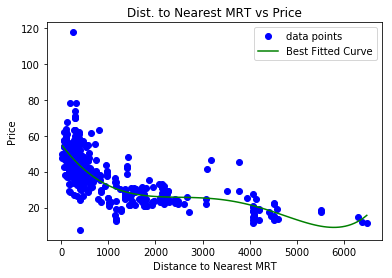

'Solution: As predicted that the nearer the MRT the higher the price, being too far from any MRT is likely being \ntoo far from the rest of the world I think!'

In [177]:
# Question 2: Is the distance of the nearst MRT is really effective ?!
mrt = df["X3 distance to the nearest MRT station"]
price = df["Y house price of unit area"]
plt.plot(mrt, price, 'bo', label = 'data points')

tmp = np.polyfit(mrt, price, 5)
p = np.poly1d(tmp)
xp = np.linspace(mrt.min(), mrt.max(), 100)
_ = plt.plot(xp, p(xp), 'g-', label = 'Best Fitted Curve')

plt.xlabel('Distance to Nearest MRT')
plt.ylabel('Price')
plt.title('Dist. to Nearest MRT vs Price')
plt.legend()
plt.show()

'''Solution: As predicted that the nearer the MRT the higher the price, being too far from any MRT
is likely being too far from the rest of the world I think!'''

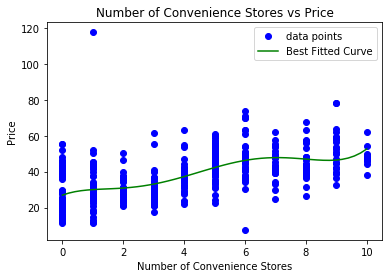

"Solution: Looks like there's an increasing trend with the number of convenience stores. seems logical"

In [175]:
# Question 3:  We all need stores around but is it the more the merrier?!

num_stores = df["X4 number of convenience stores"]
price = df["Y house price of unit area"]
plt.plot(num_stores, price, 'bo', label = 'data points')

tmp = np.polyfit(num_stores, price, 5)
p = np.poly1d(tmp)

xp = np.linspace(num_stores.min(), num_stores.max(), 50)
_ = plt.plot(xp, p(xp), 'g-', label = 'Best Fitted Curve')

plt.xlabel('Number of Convenience Stores')
plt.ylabel('Price')
plt.title('Number of Convenience Stores vs Price')
plt.legend()
plt.show()

'''Solution: Looks like there\'s an increasing trend with the number of convenience stores. seems logical'''

### Links used:

1. [seaborn.heatmap guide](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
2. [Better Heatmaps and Correlation Matrix Plots in Python](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)
3. [How do I add a title to Seaborn Heatmap?](https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap)
4. [For fitting, you can play with this awesome tool](http://madrury.github.io/smoothers/)
5. [Fitting the scattered points with **polyfit** and **np.poly1d**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) 


### Summary

In [9]:
Question_1 = 'Question 1: How does the price changes with the age of the house'
Solution_1 = '''Solution: It appears that as the age increases the price decrease for the first part, 
then it got up again! maybe it comes closer to be proven strong building against time, 
although at some point the curve went down again, I think this is cuz being so old is not accepteable
-look closer at the end of the curve-'''

Question_2 = 'Question 2: Is the distance of the nearst MRT is really effective ?!'
Solution_2 = '''As predicted that the nearer the MRT the higher the price, being too far from any MRT is likely 
being too far from the rest of the world I think!'''

Question_3 = 'Question 3:  We all need stores around but is it the more the merrier?!'
Solution_3 = 'Looks like there\'s an increasing trend with the number of convenience stores. seems logical'
print(Question_1,'\n', Solution_1, '\n', 50*'*', '\n',
      Question_2,'\n', Solution_2, '\n', 50*'*', '\n',
      Question_3,'\n', Solution_3, '\n', 50*'*', '\n',)

Question 1: How does the price changes with the age of the house 
 Solution: It appears that as the age increases the price decrease for the first part, 
then it got up again! maybe it comes closer to be proven strong building against time, 
although at some point the curve went down again, I think this is cuz being so old is not accepteable
-look closer at the end of the curve- 
 ************************************************** 
 Question 2: Is the distance of the nearst MRT is really effective ?! 
 As predicted that the nearer the MRT the higher the price, being too far from any MRT is likely 
being too far from the rest of the world I think! 
 ************************************************** 
 Question 3:  We all need stores around but is it the more the merrier?! 
 Looks like there's an increasing trend with the number of convenience stores. seems logical 
 ************************************************** 

